In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import matplotlib.patches as mpatches


In [3]:
#seteo frecuencias
fo=50
fc=1000
wo=2*np.pi*fo
wc=2*np.pi*fc
timestep=1/(1000*fc)
fs=1/timestep
#generecion de funciones
t=np.arange(-np.pi, np.pi, timestep)
port=np.cos(wc*t)
frecuenciasHz=np.arange(50,100,1)
frecuenciasRad=frecuenciasHz*2*np.pi
func=np.zeros(len(t))
for i in range(len(frecuenciasHz)):
    func=func+np.cos(frecuenciasRad[i]*t)

#modulacion
fmodSC=np.multiply(func,port)
ampPort=10
fmodLC=np.multiply(ampPort+func,port)


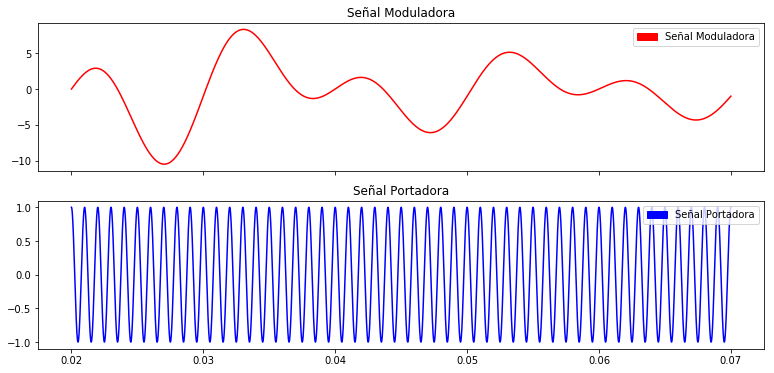

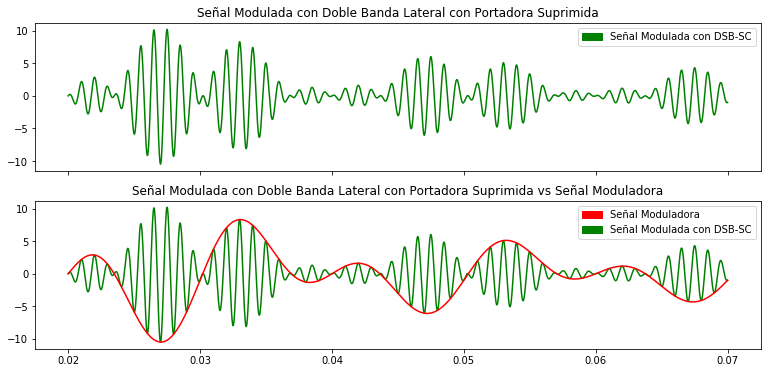

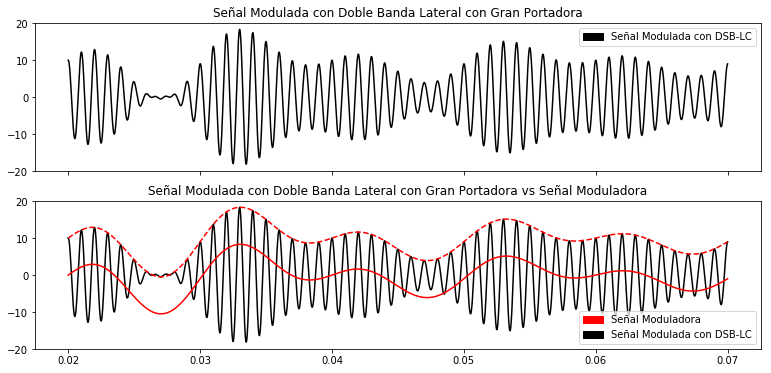

In [4]:
figura1, (ax1,ax2)= plt.subplots(2,1,sharex=True,figsize=(13,6))
figura2, (ax3,ax4)= plt.subplots(2,1,sharex=True,figsize=(13,6))
figura3, (ax5,ax6)= plt.subplots(2,1,sharex=True,figsize=(13,6))
i=np.argwhere(t>=1/fo)
j=np.argwhere(t>=3.5/fo)
red_patch = mpatches.Patch(color='red', label='Señal Moduladora')
blue_patch = mpatches.Patch(color='blue', label='Señal Portadora')
green_patch = mpatches.Patch(color='green', label='Señal Modulada con DSB-SC')
black_patch = mpatches.Patch(color='black', label='Señal Modulada con DSB-LC')


ax1.plot(t[int(i[0]):int(j[0])],func[int(i[0]):int(j[0])],'r')
ax1.set_title('Señal Moduladora')
ax1.legend(handles=[red_patch])

ax2.plot(t[int(i[0]):int(j[0])],port[int(i[0]):int(j[0])],'b')
ax2.set_title('Señal Portadora')
ax2.legend(handles=[blue_patch],loc='upper right')

ax3.plot(t[int(i[0]):int(j[0])],fmodSC[int(i[0]):int(j[0])],'g')
ax3.set_title('Señal Modulada con Doble Banda Lateral con Portadora Suprimida')
ax3.legend(handles=[green_patch])

ax4.plot(t[int(i[0]):int(j[0])],fmodSC[int(i[0]):int(j[0])],'g',t[int(i[0]):int(j[0])],func[int(i[0]):int(j[0])],'r')
ax4.set_title('Señal Modulada con Doble Banda Lateral con Portadora Suprimida vs Señal Moduladora')
ax4.legend(handles=[red_patch,green_patch])

ax5.plot(t[int(i[0]):int(j[0])],fmodLC[int(i[0]):int(j[0])],'k')
ax5.set_title('Señal Modulada con Doble Banda Lateral con Gran Portadora')
ax5.legend(handles=[black_patch])

ax6.plot(t[int(i[0]):int(j[0])],fmodLC[int(i[0]):int(j[0])],'k',t[int(i[0]):int(j[0])],ampPort+func[int(i[0]):int(j[0])],'--r',t[int(i[0]):int(j[0])],func[int(i[0]):int(j[0])],'r')
ax6.set_title('Señal Modulada con Doble Banda Lateral con Gran Portadora vs Señal Moduladora')
ax6.legend(handles=[red_patch,black_patch])

plt.show()

Potencia Señal Modulada: 27.798443203045455
Potencia Señal Modulada DSB-SC: 13.899225464067909
Potencia Señal Modulada DSB-LC: 63.90734062788447


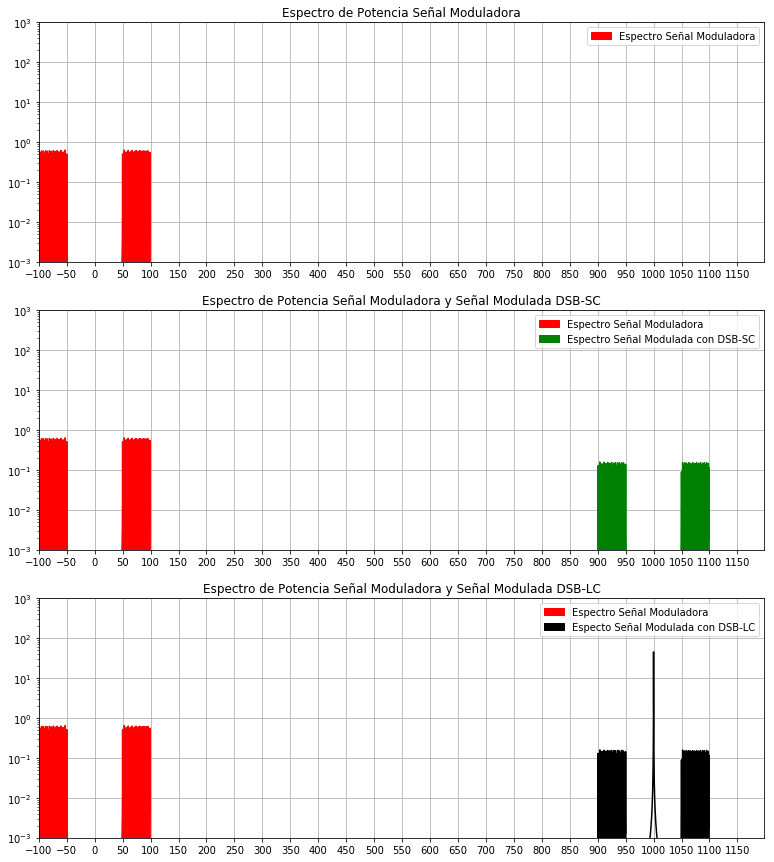

In [5]:
#Etiquetas
red_patch2 = mpatches.Patch(color='red', label='Espectro Señal Moduladora')
green_patch2 = mpatches.Patch(color='green', label='Espectro Señal Modulada con DSB-SC')
black_patch2 = mpatches.Patch(color='black', label='Especto Señal Modulada con DSB-LC')


#espectro de potencia
figura4,(x1,x2,x3)=plt.subplots(3,1,figsize=(13,15),sharey=True)

g1, potenciaf=signal.periodogram(func,fs,scaling='spectrum')
x1.semilogy(g1,potenciaf,'r',-g1,potenciaf,'r')
x1.set_ylim([0.001,1000])
x1.set_xlim([0,fc+2*np.max(frecuenciasHz)])
x1.set_title('Espectro de Potencia Señal Moduladora')
x1.grid()
x1.set_xticks(np.arange(-100,fc+2*np.max(frecuenciasHz),50))
x1.legend(handles=[red_patch2])

g2, potenciafmodSC=signal.periodogram(fmodSC,fs,scaling='spectrum')
x2.semilogy(g1,potenciaf,'r',-g1,potenciaf,'r',g2,potenciafmodSC,'g')
x2.set_ylim([0.001,1000])
x2.set_xlim([0,fc+2*np.max(frecuenciasHz)])
x2.grid()
x2.set_title('Espectro de Potencia Señal Moduladora y Señal Modulada DSB-SC')
x2.set_xticks(np.arange(-100,fc+2*np.max(frecuenciasHz),50))
x2.legend(handles=[red_patch2,green_patch2])

g3, potenciafmodLC=signal.periodogram(fmodLC,fs,scaling='spectrum')
x3.semilogy(g1,potenciaf,'r',-g1,potenciaf,'r',g3,potenciafmodLC,'k')
x3.set_ylim([0.001,1000])
x3.set_xlim([0,fc+2*np.max(frecuenciasHz)])
x3.set_title('Espectro de Potencia Señal Moduladora y Señal Modulada DSB-LC')
x3.grid()
x3.set_xticks(np.arange(-100,fc+2*np.max(frecuenciasHz),50))
x3.legend(handles=[red_patch2,black_patch2])

print('Potencia Señal Modulada: ' + str(np.sum(potenciaf)))
print('Potencia Señal Modulada DSB-SC: '+ str(np.sum(potenciafmodSC)))
print('Potencia Señal Modulada DSB-LC: ' + str(np.sum(potenciafmodLC)))
plt.show()